<p style="text-align: center">
  <img  src="../../Media\Car-Sales.png" width="600" alt="Car-Sales">
</p>

### We would like to predict the price of a used car depending on its specifications 
### Relevant regressors are: 
    - Brand: BMW is generally more expensive than a Toyota
    - Mileage: The more car is driven, the cheaper it should be
    - EngineV (Volume): Sports cars has larger engines than economy cars
    - Year: the older the car, the cheaper it is


## Load the libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Loading the raw data

In [51]:
raw_data = pd.read_csv("../../Data\Car-Sales-Data.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Explore the descriptive statistics of the variables

In [52]:
raw_data.describe(include='all') ## all is to include all numeric and non-numric features
## The count entries shows that some variables have lower number of observations which applies that there are some missing values; Price & EngineV
## Pay attention to the Unique entries for categorical variables. Note a 312 unique models; this is hard to implement at a regression. This  means more than 300 dummies
## The top entry means the most common category, below is the frequency. Registration for instance has a 3947 Yes entries. Almost all of them.


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [124]:
data = raw_data.drop(['Model'], axis = 1) ## Lets drop the model feature as this has more than 300 unique entry which means more than 300 dummies 
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [54]:
data.isnull().sum() ## there is a total of 172 missing prices, and 150 missing EngineVs

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [55]:
## Rule of thumb: If you are removing less than 5% of the observations, you are free to just remove all that have missing values
data_no_mv = data.dropna(axis=0)

In [56]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [57]:
data_no_mv.describe(include='all') ## Note the min and the max values with respect to the mean and quartiles for each variable.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs (Probability Dist. Functions)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

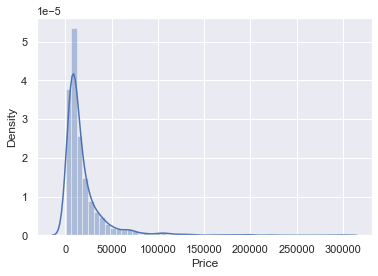

In [58]:
## for optimal results, we will be looking for normal dist. 

sns.distplot(data_no_mv['Price']) ## price however has an exponential one. this is a problem for our regression 
## by looking at the price descriptive results, we can see some outliers. look at the diff between the Min and Max; Mean and 50%
## Outliers = observations that lie on abnormal distance from other observations in the data. this will affect regresssion dramatically and cause Coef to be inflated as the
## regresson will try to place the line close to these values.
## one way to deal with outliers seemlessly is to remove top 1% of observations. Lets do it through the quantile method

### Dealing with Outliers

In [59]:
## for the price feature, I want to get the 99th percentile and keep the data below it
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

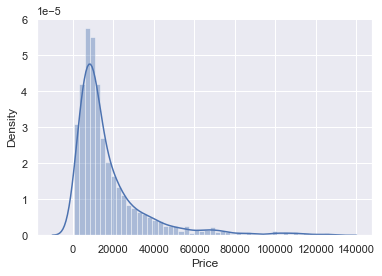

In [60]:
sns.distplot(data_1['Price'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

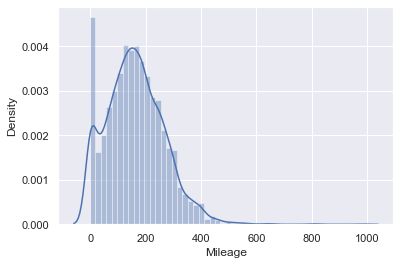

In [61]:
sns.distplot(data_no_mv['Mileage'])

In [62]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

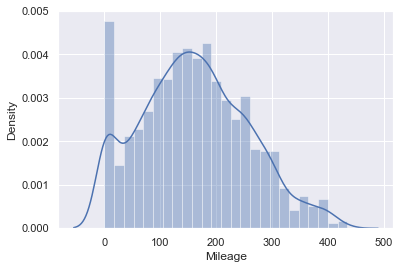

In [63]:
sns.distplot(data_2['Mileage'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

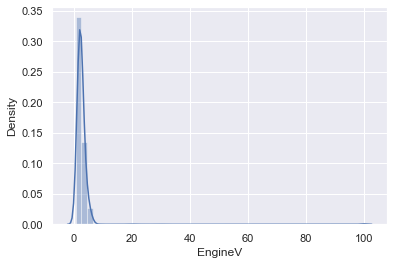

In [64]:
sns.distplot(data_no_mv['EngineV']) ## This is a little strange entry. If you would examine this, you would see values like 99.99, 90.00, 74.00, 75.00,..etc
## These are not usual values. moreover, looking at the descriptives, it seems that most values are really low. A quick search on Google would confirm that the intervals of engine
## volumes shoul dnormally fall between 0.6 and 6.5. So here will keep values that is below 6.5.

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

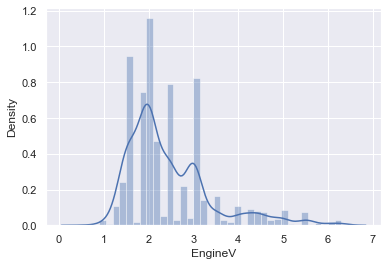

In [65]:
data_3 = data_2[data_2['EngineV'] < 6.5] ## our benchmark is 6.5
sns.distplot(data_3['EngineV'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

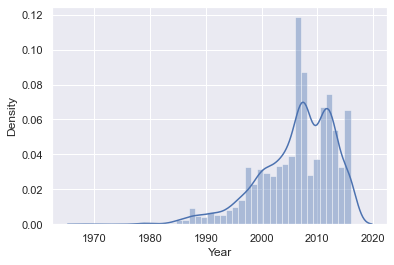

In [66]:
sns.distplot(data_no_mv['Year']) ## the problem with the year that its on the low end. most cars are newer but there seems to be some older ones.

In [67]:
q = data_3['Year'].quantile(0.01) ## I'll remove the first percentile and keep all that is higher. 
data_4 = data_3[data_3['Year']> q]

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

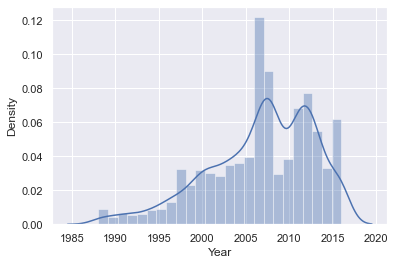

In [68]:
sns.distplot(data_4['Year'])

In [69]:
data_cleaned = data_4.reset_index(drop=True) ## Yo use only the data that is useful for analysis

In [70]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

#### The numerical variables Price, Year, EngineV, and Mileage are those that are most likely to be more challenging and causing us more problems

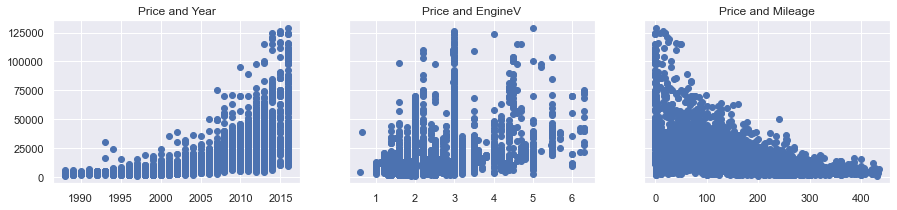

In [71]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter (data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter (data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter (data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

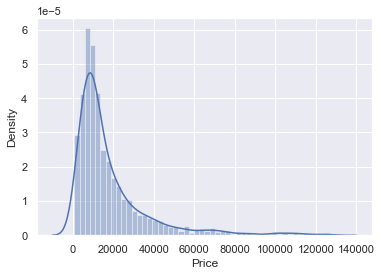

In [72]:
## We can spot patterns but definitely not linear ones. We know we should not run a linear regression in this case.
## We should first tranform one or more variables. 
sns.distplot(data_cleaned['Price']) ## recall the dist plot of price. Price is not normally distributed, and from here, its relationships to the others 
## rather normally distributed features is not linear. 
 


In [73]:
## Log transformation is common way to deal with this issue. it is especially useful when facin exponential scatter plots like we do in the Price
## Lets take the log of price and create the plots again
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_Price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


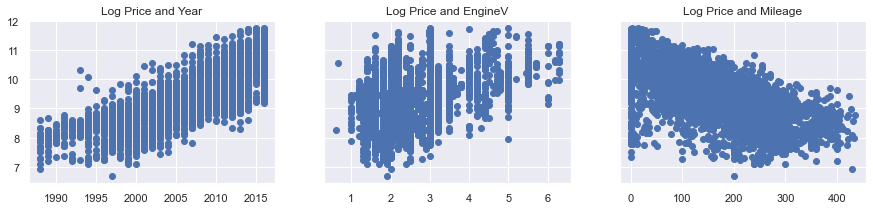

In [74]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter (data_cleaned['Year'], data_cleaned['log_Price'])
ax1.set_title('Log Price and Year')
ax2.scatter (data_cleaned['EngineV'], data_cleaned['log_Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter (data_cleaned['Mileage'], data_cleaned['log_Price'])
ax3.set_title('Log Price and Mileage')

plt.show() ## We can see a Linear Pattern in all plots now

In [75]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1) ## Drop the original price variable from the data frame since its no longer needed

In [76]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### Test for Multicollinearity

In [38]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_Price'], dtype=object)

In [44]:
## Its logical that 'Year' and 'Mileage' will be correlated. The newer the car, the lower its Mileage.
## VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']] ## we are checking these festure for multicollinearity
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


VIF = 1: no Multicollinearity
1 < VIF < 5: Perfectly okay
Some sources says 5 < VIF is Unacceptable. Ohters put the boundary at 6. some put 10 as the cutoff line
There is no formal consensus on the topic. For this study, we will accept anything below 10. So the Year feature in this case is unacceptable.
Year is too correlated with other variables, therefore, let's remove Year

In [78]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

In [79]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Create dummy variables

##### Categorical variables are added to the regression through dummy variables. 
##### Pandas use a function called get_dummies that spots all categorical variables and creates dummies automatically.
##### If we have N categories for a feature, we have to create N-1 dummies. Here is an example:

<p style="text-align: center">
  <img  src="../../Media\dummies.png" width="600" alt="Car-Sales">
</p>

In [80]:
data_with_dummies = pd.get_dummies (data_no_multicollinearity, drop_first = True)

In [81]:
data_with_dummies.head()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange the columns

In [82]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [83]:
cols = ['log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [84]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression Model

### Declare the inputs and the target

In [86]:
targets = data_preprocessed['log_Price']
inputs = data_preprocessed.drop(['log_Price'], axis=1)

### Scale the data

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [90]:
inputs_scaled = scaler.transform(inputs) ## Its not usually recommended to standardize dummy variables

### Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (inputs_scaled, targets, test_size = 0.2, random_state=365)


### Create the regression

In [92]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [96]:
## A simple way to check the final result is to plot the predicted values against the observed values
y_hat = reg.predict(x_train)

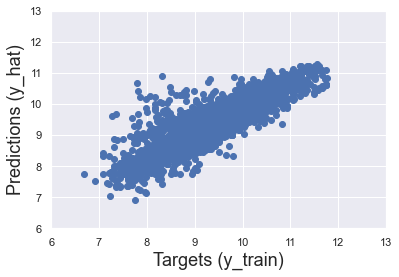

In [99]:
plt.scatter(y_train, y_hat) ## Plot the observed and the predicted targets
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
## In the best case scenario, if the target is 7, we want the Predicted to be 7 as well.
## Ultimately, we can draw a 45 degree line which shows the best possible match between targets and predictions.
## The closer our scatter plot is to this line, the better the model.
## Our results here is not perfect, definitely not random. our points are situated around 45 degree line so our model has passed the Scatter plot check

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

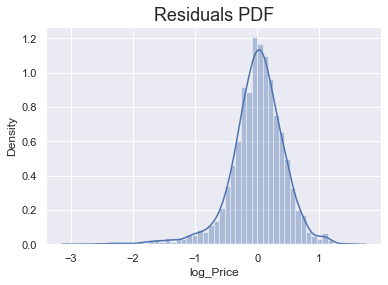

In [101]:
## Another popular check id the residual check. The residual is the difference between the targets and the predictions. 
## Residual plot referes to the distribution of the residuals. 
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)
## from the regression assumptions, we know the errors must be normally distributed with a mean of Zero. The residuals are the estimates of the errors.
## the results looks quite normal in the sense of normally distributed.
## the only possible issue could be that there is a much longer tail on the negative side. Therefore, a much higher price is predicted than is observed.

In [103]:
## Finally, let's calculate the R-Squared.
reg.score(x_train, y_train)
## Our model is explaining around 75% of the variability of the data. This a relatively good result

0.744996578792662

### Finding the Weights and Bias

In [105]:
reg.intercept_ ## this is the bias

9.415239458021299

In [106]:
reg.coef_ ## this is the weights

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [107]:
## create a summary table to organize your results
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


#### Weights interpretation

1. A positive weight shows that as a feature increases in value, so do the log_price and Price respectively.
Example: the bigger the Engine Volume, the higher the price
2. A negative weight shows that as a feature increases in value, log_price and Price decrease. ex: the more mileage, the lower the price
3. Dummy Variables:
  -  A positive weight shows that the respective brand is more expensive than the Audi. ex: on average, if a car is BMW it would be more expensive than an Audi 
  -  A negative weight shows that a respective brand is less expensive than the Audi


In [109]:
# Let's take the Brand for instance
data_cleaned['Brand'].unique() ## we have 7 brands and we notice that Audi is the dropped one which means whenevr all other dummies are zero
## Audi is 1. So Audi is the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing

In [110]:
## Lets test how our model performed
y_hat_test = reg.predict(x_test)

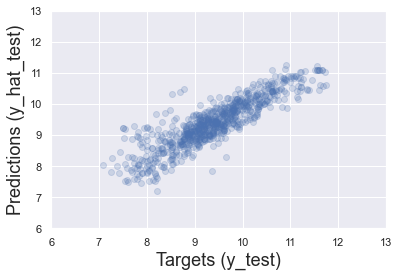

In [113]:
plt.scatter(y_test, y_hat_test, alpha = 0.2) 
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
## we can see that our model is better at predicting higher prices than lower prices

In [115]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head() 

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [116]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [117]:
y_test = y_test.reset_index(drop=True) # this will reset the index of y_test and will take care of the missing values

In [118]:
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_Price, dtype: float64

In [120]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [121]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [122]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf

,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [123]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080
